In [1]:
from rbm import RBM
from autoencoder_rbm import Autoencoder_RBM
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('../data/64times_overlap.csv')
df.drop("timestamp", inplace=True, axis=1)
#df.dropna(inplace=True)

In [3]:
min_max_scaler = MinMaxScaler()
df = min_max_scaler.fit_transform(df)

In [6]:
autoencoder = Autoencoder_RBM(rbm_layers=[1000, 500, 100],
                              rbm_gauss_visible=True,
                              finetune_num_epochs=300,
                              do_pretrain=False,
                              finetune_loss_func='mse')


compres, recons, loss_summary = autoencoder.fit(np.array(df), validation_set=np.array(df), test_set = np.array(df))

Iter 1: Training set: current loss 1.390221  ||  Validation set: current loss 1.390316
Validation:  [2467 2466 2464 2495 2496 2465 2468 2494 2493 2492 2525 2603 2602 2600 2523
 2497 2524 2601 2463  906 2522 2448  907 2455  908]
Iter 2: Training set: current loss 1.205209  ||  Validation set: current loss 1.205270
Validation:  [2467 2466 2495 2496 2464 2465 2468 2494 2493 2492 2525 2603 2602 2600 2523
 2497 2524 2601 2463  906 2522  907 2448 2455  908]
Iter 3: Training set: current loss 1.042839  ||  Validation set: current loss 1.042945
Validation:  [2467 2466 2496 2495 2464 2465 2468 2494 2493 2492 2525 2603 2602 2600 2523
 2497 2524 2601 2522 2463  906  907 2448  908 2455]
Iter 4: Training set: current loss 0.904687  ||  Validation set: current loss 0.904684
Validation:  [2467 2466 2496 2495 2465 2464 2468 2494 2493 2492 2525 2603 2602 2600 2523
 2497 2524 2601 2522 2463  906  907 2448  908 2455]
Iter 5: Training set: current loss 0.788547  ||  Validation set: current loss 0.788602
V

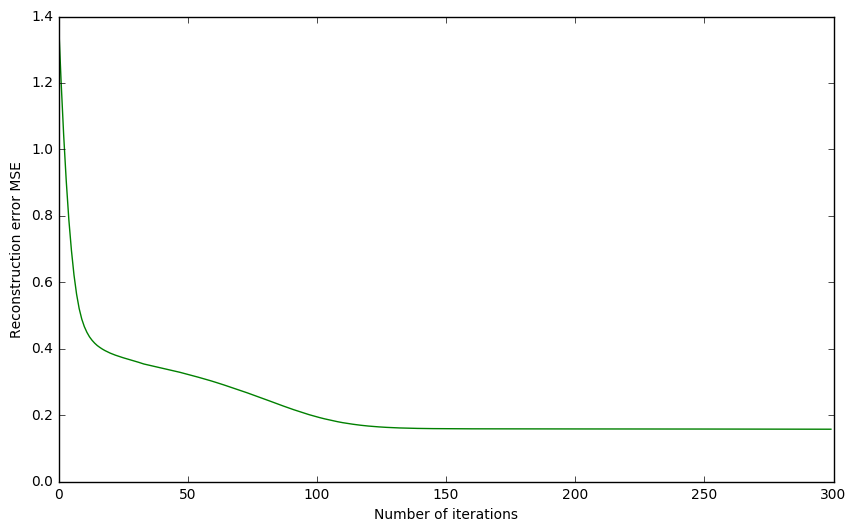

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(loss_summary, 'g-', label='')
plt.xlabel('Number of iterations')
plt.ylabel('Reconstruction error MSE')
plt.savefig('hd_loss.png')
plt.show()

In [7]:
autoencoder_2 = Autoencoder_RBM(rbm_layers=[2000, 500, 100],
                              rbm_gauss_visible=True,
                              finetune_num_epochs=300,
                              do_pretrain=False,
                              finetune_loss_func='mse')


compres_2, recons_2, loss_summary_2 = autoencoder_2.fit(np.array(df), validation_set=np.array(df), test_set = np.array(df))

Iter 1: Training set: current loss 1.944235  ||  Validation set: current loss 1.944405
Validation:  [2467 2496 2495 2466 2465 2468 2494 2464 2493 2603 2497 2492 2525 2602 2524
 2601 2600 2523  906  907 2522 2526 2463 2604 2469]
Iter 2: Training set: current loss 1.688586  ||  Validation set: current loss 1.688321
Validation:  [2467 2496 2495 2466 2465 2494 2468 2464 2493 2603 2497 2525 2492 2602 2524
 2601 2523 2600  907  906 2522 2463 2526 2604 2469]
Iter 3: Training set: current loss 1.464708  ||  Validation set: current loss 1.464400
Validation:  [2467 2496 2495 2466 2465 2494 2468 2464 2493 2603 2525 2497 2492 2602 2524
 2601 2523 2600  907  906 2522 2463 2526 2604 2469]
Iter 4: Training set: current loss 1.272146  ||  Validation set: current loss 1.272123
Validation:  [2467 2496 2495 2466 2465 2494 2468 2464 2493 2603 2525 2497 2492 2602 2524
 2523 2601 2600  907  906 2522 2463 2526 2469 2604]
Iter 5: Training set: current loss 1.107331  ||  Validation set: current loss 1.107549
V

KeyboardInterrupt: 

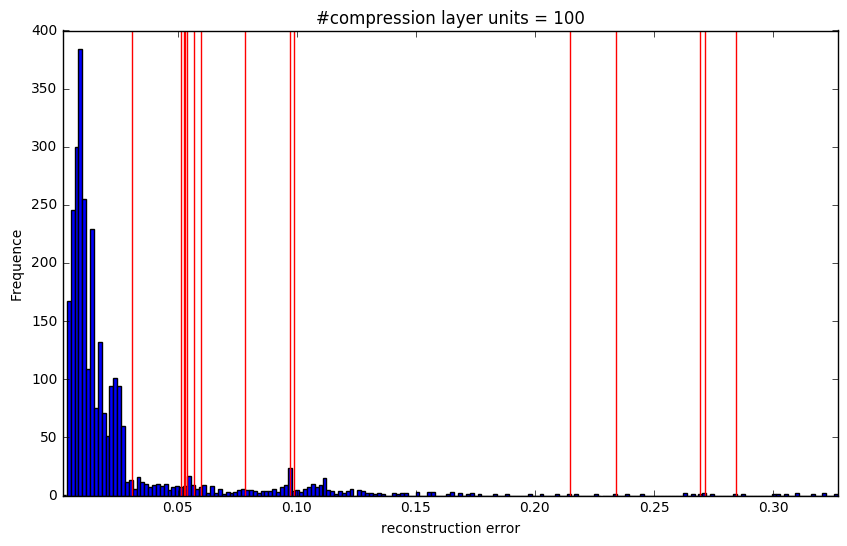

In [17]:
def recons_error(input_set, recons):
    dif = input_set - recons
    dif = np.power(dif, 2)
    return np.mean(dif, axis=1)

reconstruction_error = recons_error(np.array(df), recons)
plt.figure(figsize=(10, 6))
min_bound = np.min(reconstruction_error) / 2.0
max_bound = np.max(reconstruction_error)
plot_range = max_bound - min_bound
num_bins = 200
bins = [ (min_bound + i * plot_range / num_bins) for i in range(num_bins+1)]
freq, _, _ = plt.hist(reconstruction_error, bins=bins)

index_abnormal_64 = [1081, 1082, 374, 375, 376, 377, 887, 888, 889, 2522, 2523, 2524, 2525, 2526, 2527]

ax = plt.axes()
for item in index_abnormal_64:
    ax.axvline(reconstruction_error[item], color='r', linestyle='-')

ax.set_xlim([min_bound, max_bound])
plt.xlabel(r'reconstruction error')
plt.ylabel(r'Frequence')
plt.title('#compression layer units = 100')
plt.savefig('hdp_1000_500_100.png')
plt.show()